<a href="https://colab.research.google.com/github/ngocbaosp/ML-Projects/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Course: Machine Learning 
#### Project: 01
#### Team members
#### + Mauro Travieso Pena
#### + Quoc Huy Luong
#### + Ngoc Bao Tran
***


## Multi-layer Perceptron Classifier


### Import Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install library
# !pip3 install -U yellowbrick

%matplotlib inline

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


# MyPCA

def myPCA(data,n):
    pca = PCA(n_components=n)
    pca.fit(data)
    df = pca.transform(data)
    PCA_Data = pd.DataFrame(df)
    return PCA_Data



# myNormalize

def myNormalize(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    Normalized_Data = min_max_scaler.fit_transform(data)
    Normalized_Data = pd.DataFrame(Normalized_Data)
    return Normalized_Data



# myEncode

def myEncode(data,col): 
    NewData_Encode = data.copy()
    NewData_Encode = pd.get_dummies(NewData_Encode, columns=col, prefix = col)
    return NewData_Encode



# myCleanAndTransformData


def myCleanAndTransformData(data):
    
    #Drop null rows
    NewData = data.dropna()
    #Remove unknown ata
    NewData = NewData[NewData['episodes']!='Unknown']
    #Add a new column rating class 
    NewData['Class']=1
    # 1: High
    # or 0: Low based on rating
    NewData.loc[NewData['rating'] >= NewData['rating'].mean(), 'Class'] = 1
    NewData.loc[NewData['rating'] < NewData['rating'].mean(), 'Class'] = 0
    
    #Split genre values into rows
    NewData = pd.DataFrame(NewData.genre.str.split(',').tolist(), index=[NewData.anime_id,NewData.type,NewData.episodes,NewData.rating,NewData.members,NewData.Class]).stack()
    NewData = NewData.reset_index([0,'anime_id','type','episodes','rating','members','Class'])
    NewData.columns=['anime_id','type','episodes','rating','members','Class','genre']
    
    #Encode type feature: 6 unique values
    NewData = myEncode(NewData,['type'])
 
    #Encode genre feature: 82 unique values
    NewData = myEncode(NewData,['genre'])
 
     #Drop anmie_id,rating,Class
    NewData = NewData.drop(['rating'],axis=1)
    NewData = NewData.drop(columns=['anime_id'])
    #NewData = NewData.drop(columns=['Class'])  
    
    return NewData



### Load data from files


In [3]:
df = pd.read_csv('anime.csv')
df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Clean and Transform Data


In [4]:
cleaned_data= myCleanAndTransformData(df)
df_test = cleaned_data['Class']
df_train = cleaned_data.drop(columns=['Class'])
df_train.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,genre_ Comedy,genre_ Dementia,genre_ Demons,genre_ Drama,genre_ Ecchi,genre_ Fantasy,genre_ Game,genre_ Harem,genre_ Hentai,genre_ Historical,genre_ Horror,genre_ Josei,genre_ Kids,genre_ Magic,genre_ Martial Arts,genre_ Mecha,genre_ Military,genre_ Music,genre_ Mystery,genre_ Parody,genre_ Police,genre_ Psychological,genre_ Romance,genre_ Samurai,genre_ School,genre_ Sci-Fi,genre_ Seinen,genre_ Shoujo,genre_ Shoujo Ai,genre_ Shounen,...,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Game,genre_Harem,genre_Hentai,genre_Historical,genre_Horror,genre_Josei,genre_Kids,genre_Magic,genre_Martial Arts,genre_Mecha,genre_Military,genre_Music,genre_Mystery,genre_Parody,genre_Police,genre_Psychological,genre_Romance,genre_Samurai,genre_School,genre_Sci-Fi,genre_Seinen,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Normalize Data


In [5]:
scaled_df = myNormalize(df_train)
scaled_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using PCA


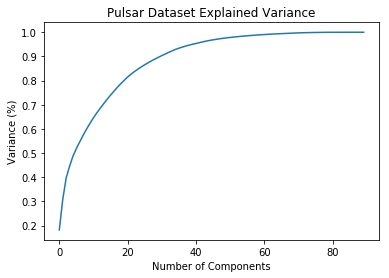

In [6]:
# https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [7]:
# Now we will choose 40 components so we can preserve something around 98.8% or 99% of the total variance of the data
n_components=40
pca_df = myPCA(scaled_df, n_components)
pca_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.311566,0.786508,-0.420821,0.005236,-0.078664,-0.049645,-0.062636,0.007171,-0.075349,-0.030938,0.086265,-0.139423,-0.157023,0.028296,-0.081142,-0.232689,-0.299073,0.804718,-0.258789,-0.007698,-0.094830,-0.108058,-0.062482,0.025709,0.003355,-0.024976,-0.033470,-0.004903,-0.011725,-0.006790,-0.011803,-0.014501,0.009361,-0.010634,-0.008252,-0.004034,0.005651,-0.013671,-0.006364,-0.009341
1,-0.284842,0.763991,-0.412009,-0.010872,-0.110067,-0.087028,-0.096769,0.054629,-0.179466,-0.045544,0.764386,0.581467,0.033980,-0.066736,0.030945,0.068189,0.010380,-0.031950,-0.043617,0.008151,-0.027471,-0.040196,-0.033368,0.004741,0.006585,-0.016129,-0.028649,-0.009406,-0.005311,-0.004098,-0.007278,-0.012995,0.006250,-0.011482,-0.008329,-0.001291,0.008717,-0.013170,-0.008087,-0.009723
2,-0.284838,0.767910,-0.395570,-0.007614,-0.091869,-0.059765,-0.062085,0.036505,-0.086830,-0.024721,0.092181,-0.282590,-0.451934,-0.569129,0.527433,0.287048,0.035417,-0.060918,-0.105736,-0.014496,-0.031113,-0.062848,-0.045545,0.012573,0.004905,-0.021732,-0.033673,-0.011339,-0.009075,-0.006179,-0.009523,-0.014701,0.006462,-0.012859,-0.009957,-0.005244,0.006851,-0.015139,-0.012689,-0.009609
3,-0.291600,0.777175,-0.408316,0.000301,-0.080828,-0.049799,-0.056889,0.019144,-0.070776,-0.027970,0.078032,-0.143403,-0.122692,-0.013063,-0.109523,-0.389583,-0.602805,-0.563640,-0.290751,-0.050591,-0.053019,-0.099435,-0.061860,0.024379,0.000875,-0.027261,-0.035561,-0.010725,-0.013589,-0.007701,-0.012296,-0.015402,0.007522,-0.011416,-0.009419,-0.007730,0.004568,-0.014744,-0.011663,-0.011382
4,0.732145,-0.153155,-0.102203,-0.458230,0.816867,0.046173,0.015773,-0.064780,0.014353,-0.005002,0.000576,0.017521,-0.007153,0.008119,0.015719,-0.003245,-0.012144,-0.006513,-0.013979,0.005159,-0.027942,-0.018716,-0.009797,-0.001105,0.018559,0.005495,-0.017896,0.010353,0.021673,0.001177,0.006660,-0.013152,0.019544,-0.015149,-0.007191,0.027641,0.027023,-0.020615,0.000360,0.040570


### Splitting data


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(pca_df, df_test, test_size=0.3, random_state=109)



### Generating model


In [9]:
#Import MLP model
from sklearn.neural_network import MLPClassifier

# Create a MLP Classifier with PCA data
clf = MLPClassifier(max_iter=500)

# Train the model using the training sets
clf.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Evaluating model


In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import model_selection

# Model Accuracy: how often is the classifier correct?
# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Predict with PCA data:")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification report: ")
print(classification_report(y_test, y_pred))

Predict with PCA data:
Accuracy:  0.7214278950856926
Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.43      0.52      3748
           1       0.74      0.88      0.80      6813

    accuracy                           0.72     10561
   macro avg       0.70      0.66      0.66     10561
weighted avg       0.71      0.72      0.70     10561



In [11]:
# Compute the accuracy score for all the cross validation folds.
scores = model_selection.cross_val_score(clf, X_test, y_test, cv=5)
scores
# Take the mean of the scores (because we have one for each fold)
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy and the 95% confidence interval of the estimate are: 0.703 (+/- 0.70)


### Model Tuning with Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']
} 


In [0]:
grid = GridSearchCV(clf, param_grid, refit=True, verbose=3, scoring="accuracy", n_jobs=1, cv=5)

In [14]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] alpha=0.0001, hidden_layer_sizes=(50, 50, 50) ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.0001, hidden_layer_sizes=(50, 50, 50), score=0.705, total=  39.4s
[CV] alpha=0.0001, hidden_layer_sizes=(50, 50, 50) ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s remaining:    0.0s


[CV]  alpha=0.0001, hidden_layer_sizes=(50, 50, 50), score=0.699, total=  42.4s
[CV] alpha=0.0001, hidden_layer_sizes=(50, 50, 50) ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV]  alpha=0.0001, hidden_layer_sizes=(50, 50, 50), score=0.708, total=  34.4s
[CV] alpha=0.0001, hidden_layer_sizes=(50, 50, 50) ...................
[CV]  alpha=0.0001, hidden_layer_sizes=(50, 50, 50), score=0.721, total=  56.4s
[CV] alpha=0.0001, hidden_layer_sizes=(50, 50, 50) ...................
[CV]  alpha=0.0001, hidden_layer_sizes=(50, 50, 50), score=0.717, total=  50.3s
[CV] alpha=0.0001, hidden_layer_sizes=(50, 100, 50) ..................
[CV]  alpha=0.0001, hidden_layer_sizes=(50, 100, 50), score=0.707, total= 1.1min
[CV] alpha=0.0001, hidden_layer_sizes=(50, 100, 50) ..................
[CV]  alpha=0.0001, hidden_layer_sizes=(50, 100, 50), score=0.699, total= 1.3min
[CV] alpha=0.0001, hidden_layer_sizes=(50, 100, 50) ..................
[CV]  alpha=0.0001, hidden_layer_sizes=(50, 100, 50), score=0.723, total= 1.8min
[CV] alpha=0.0001, hidden_layer_sizes=(50, 100, 50) ..................
[CV]  alpha=0.0001, hidden_layer_sizes=(50, 100, 50), score=0.722, total=  47.2s
[CV] alpha

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=0.0001, hidden_layer_sizes=(100,), score=0.700, total=  50.7s
[CV] alpha=0.0001, hidden_layer_sizes=(100,) .........................
[CV]  alpha=0.0001, hidden_layer_sizes=(100,), score=0.716, total=  32.9s
[CV] alpha=0.0001, hidden_layer_sizes=(100,) .........................
[CV]  alpha=0.0001, hidden_layer_sizes=(100,), score=0.709, total=  34.2s
[CV] alpha=0.0001, hidden_layer_sizes=(100,) .........................
[CV]  alpha=0.0001, hidden_layer_sizes=(100,), score=0.715, total=  45.4s
[CV] alpha=0.05, hidden_layer_sizes=(50, 50, 50) .....................
[CV]  alpha=0.05, hidden_layer_sizes=(50, 50, 50), score=0.708, total= 1.7min
[CV] alpha=0.05, hidden_layer_sizes=(50, 50, 50) .....................
[CV]  alpha=0.05, hidden_layer_sizes=(50, 50, 50), score=0.707, total= 2.5min
[CV] alpha=0.05, hidden_layer_sizes=(50, 50, 50) .....................
[CV]  alpha=0.05, hidden_layer_sizes=(50, 50, 50), score=0.716, total= 1.3min
[CV] alpha=0.05, hidden_layer_sizes=(50, 50,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 38.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=500,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'alpha': [0.0001, 0.05],
                   

In [15]:
print("The best score is: {}".format(grid.best_score_))
print("The best estimator is: {}".format(grid.best_estimator_))
print("The best params is: {}".format(grid.best_params_))

The best score is: 0.7130681818181818
The best estimator is: MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
The best params is: {'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50)}


In [0]:
# Re-run predictions with best model
model = grid.best_estimator_
grid_predictions = grid.predict(X_test)

In [17]:
# Re-evaluate model
print("With normalized data and the best estimator from Grid Search:")
print("Accuracy: ", metrics.accuracy_score(y_test, grid_predictions))
print("Classification report: ")
print(classification_report(y_test, grid_predictions))

With normalized data and the best estimator from Grid Search:
Accuracy:  0.7180191269766121
Classification report: 
              precision    recall  f1-score   support

           0       0.64      0.47      0.54      3748
           1       0.75      0.85      0.80      6813

    accuracy                           0.72     10561
   macro avg       0.69      0.66      0.67     10561
weighted avg       0.71      0.72      0.71     10561



### AUC

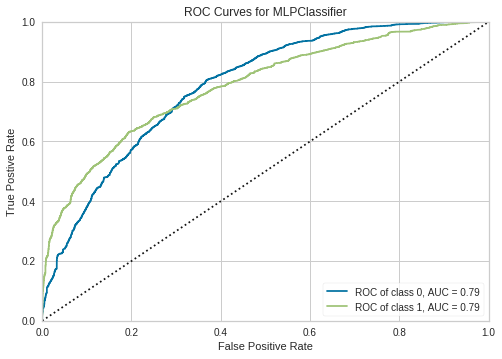

In [18]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, micro=False, macro=False, per_class=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

### Validation Curve

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

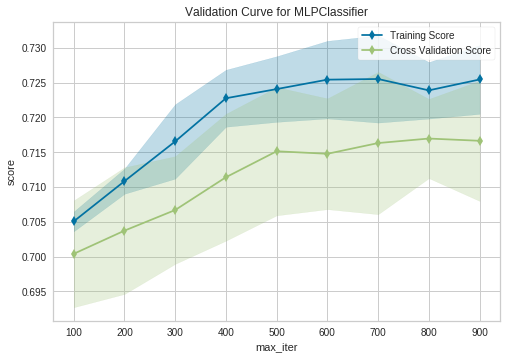

In [19]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

# Create the validation curve visualizer
cv = StratifiedKFold(12)

param_range = np.arange(100, 1000, 100)

v_viz = ValidationCurve(
    clf, param_name="max_iter", param_range=param_range,
    cv=cv, scoring="accuracy", n_jobs=1
)

v_viz.fit(X_train, y_train)
v_viz.poof()

In this plot you can see the training scores and validation scores of an MLP for different values of the max_iteration. The training score is everywhere higher than the validation score; the training score is monotonically improving with increased the iteration; and the validation score is increased slightly.

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found at max_iteration = 800


### Learning Curve

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

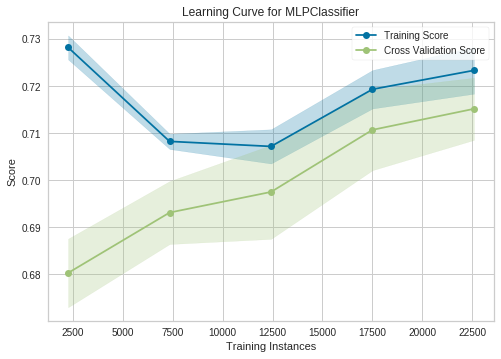

In [20]:
from yellowbrick.model_selection import LearningCurve


l_viz = LearningCurve(
    clf, cv=cv,
    scoring='accuracy', n_jobs=1
)

# Fit and poof the visualizer
l_viz.fit(X_train, y_train)
l_viz.poof()

Our learning algorithm (MLP) suffers from high variance when training instances begin from 2500. But after that we see the training score and the validation score increase together and decrease the variance between them.

At this point, here are a couple of things we could do to improve our model:

*    Adding more training instances.
*    Increase the iteration or hidden layers.

